[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nguyenphuvinhtoan/SpecializedProject_HK231/blob/main/BboxSize_And_FindCenterOfMask.ipynb)

# Thống kê dữ liệu kích thước bbox cho người

In [ ]:
import os
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
images_valid_path = "/dscilab_nhanpham/workspace/YOLOv8_HP/Exp/231124/dataset/validate/images/"
labels_valid_path = "/dscilab_nhanpham/workspace/YOLOv8_HP/Exp/CenterHist/val_labels_detection/"

In [ ]:
labels_valid_list = os.listdir(labels_valid_path)
len(labels_valid_list)

5000

In [ ]:
total_w = []
total_h = []

In [ ]:
for labels in labels_valid_list:
    # print(labels)
    image_p = images_valid_path + labels[:-4] + ".jpg"
    image = cv2.imread(image_p, cv2.IMREAD_GRAYSCALE)
    img_h,img_w = image.shape
    label_p = labels_valid_path + labels
    f = open(label_p, "r")
    lines = f.readlines()
    for line in lines:
        _, _, _, w, h = line.split(' ')
        width = int(round(float(w)*img_w))
        height = int(round(float(h)*img_h))
        if width == 1: print(labels)
        if height == 1: print(labels)
        # print(width,height)
        total_w.append(width)
        total_h.append(height)

In [ ]:
print(len(total_w))

17520


In [ ]:
images_train_path = "/dscilab_nhanpham/workspace/YOLOv8_HP/Exp/231124/dataset/train/images/"
labels_train_path = "/dscilab_nhanpham/workspace/YOLOv8_HP/Exp/CenterHist/train_labels_detection/"

In [ ]:
labels_train_list = os.listdir(labels_train_path)
len(labels_train_list)

28280

In [ ]:
for labels in labels_train_list:
    # print(labels)
    image_p = images_train_path + labels[:-4] + ".jpg"
    image = cv2.imread(image_p, cv2.IMREAD_GRAYSCALE)
    img_h,img_w = image.shape
    label_p = labels_train_path + labels
    f = open(label_p, "r")
    lines = f.readlines()
    for line in lines:
        _, _, _, w, h = line.split(' ')
        h = float(h)
        w = float(w)
        width = int(round(w*img_w))
        height = int(round(h*img_h))
        # print(width,height)
        total_w.append(width)
        total_h.append(height)

In [ ]:
print(len(total_w))

110732


In [ ]:
# Convert to ndarray
list_height = np.array(total_h)
list_width = np.array(total_w)

In [ ]:
print("Khảo sát giá trị chiều cao")
print(f"Miền giá trị: [{min(list_height)}, {max(list_height)}]")
print("Giá trị trung bình: {:.2f}".format(np.mean(np.array(list_height))))
print("Giá trị Variance: {:.2f}".format(np.var(np.array(list_height))))
print("Giá trị STD: {:.2f}".format(np.std(np.array(list_height))))
print("####################################")
print("Khảo sát giá trị chiều rộng")
print(f"Miền giá trị: [{min(list_width)}, {max(list_width)}]")
print("Giá trị trung bình: {:.2f}".format(np.mean(np.array(list_width))))
print("Giá trị Variance: {:.2f}".format(np.var(np.array(list_width))))
print("Giá trị STD: {:.2f}".format(np.std(np.array(list_width))))

Khảo sát giá trị chiều cao
Miền giá trị: [2, 943]
Giá trị trung bình: 245.70
Giá trị Variance: 11420.72
Giá trị STD: 106.87
####################################
Khảo sát giá trị chiều rộng
Miền giá trị: [3, 928]
Giá trị trung bình: 146.04
Giá trị Variance: 7670.68
Giá trị STD: 87.58


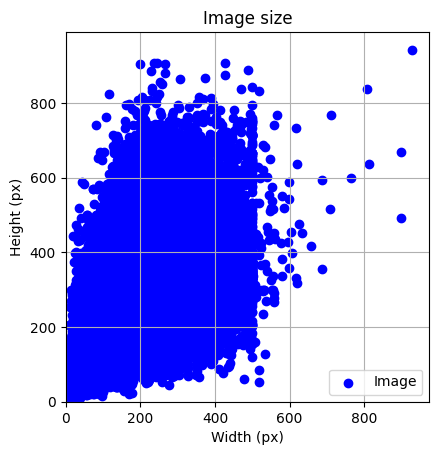

In [ ]:
plt.scatter(list_width, list_height, label="Image", color="blue")
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.xlim(left=0)
plt.ylim(bottom=0)
# Đánh tên cho trục
plt.xlabel("Width (px)")
plt.ylabel("Height (px)")
plt.title("Image size")
plt.legend(loc="best")
# Hiện plot
plt.show()

In [ ]:
# Đổi biểu đồ scatter thành biểu đồ heatmap
# Chuẩn bị data để vẽ biểu đồ
x01_div50 = [x // 50 if x < 600 else 0 for x in list_width]
y01_div50 = [y // 50 if y < 600 else 0 for y in list_height]
data01_div50 = np.zeros((max(y01_div50) + 1, max(x01_div50) + 1))
for i in range(len(x01_div50)):
  data01_div50[y01_div50[i]][x01_div50[i]] += 1
x01_div50_labels = [(i+1)*50 for i in range(max(x01_div50) + 1)]
y01_div50_labels = [(i+1)*50 for i in range(max(y01_div50) + 1)]

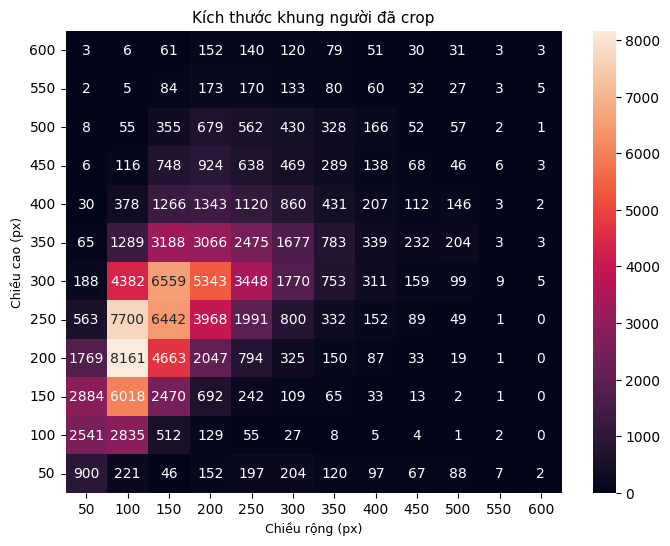

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
# Vẽ biểu đồ heatmap
hm = sns.heatmap(data=data01_div50, xticklabels=x01_div50_labels,
                 yticklabels=y01_div50_labels, annot=True, fmt='g', ax=ax)
hm.invert_yaxis()
# Đánh tên cho trục
plt.xlabel("Chiều rộng (px)", fontsize=9)
plt.ylabel("Chiều cao (px)", fontsize=9)
plt.title("Kích thước khung người đã crop", fontsize = 11)
plt.yticks(rotation=0)
# Hiện biểu đồ
plt.show()

# Crop ảnh người và tìm trọng tâm của các bộ phận

In [1]:
# Liệt kê các task
# B1: load hình nhãn 1 người
# B2: Lấy bbox cho người
# B3: Tạo np mới từ bbox cắt ảnh
# B4: Scale ảnh và padding
# B5: Lấy contour
# B6: Lấy tâm
# B7: Tính khoảng cách so với top left của (150, 250)
# B8: Lưu kết quả vào list rồi vào txt

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
def cv2_imshow(cv2image):
    plt.imshow(cv2.cvtColor(cv2image, cv2.COLOR_BGR2RGB))
    plt.show()

In [3]:
# Kích thước ảnh chuẩn
STANDARD_W = 150
STANDARD_H = 250
# colour map
labels_decoder = ["Background", "Hat", "Hair", "Glove", "Sunglasses", "UpperClothes", "Dress", "Coat", "Socks", "Pants", "Torso-skin", "Scarf", "Skirt", "Face", "Left-arm", "Right-arm", "Left-leg", "Right-leg", "Left-shoe", "Right-shoe", "Person"]
label_colours = [(0,0,0)
                , (128,0,0), (255,0,0), (0,85,0), (170,0,51), (255,85,0), (0,0,85), (0,119,221), (85,85,0), (0,85,85), (85,51,0), (52,86,128), (0,128,0)
                , (0,0,255), (51,170,221), (0,255,255), (85,255,170), (170,255,85), (255,255,0), (255,170,0)]
def decode_labels(image):
    h, w = image.shape
    r, g ,b = [], [] , []
    for i in range(h):
        for j in range(w):
            x,y,z = label_colours[image[i,j]]
            r.append(x)
            g.append(y)
            b.append(z)
    r = np.array(r, dtype=np.uint8).reshape((h,w))
    g = np.array(g, dtype=np.uint8).reshape((h,w))
    b = np.array(b, dtype=np.uint8).reshape((h,w))
    return cv2.merge((b,g,r))

In [4]:
def create_anchor_pos(image):
    # height and width of image
    h, w = image.shape[:2]
    # Top-left and right-bottom position
    min_x, min_y, max_x, max_y = w, h, 0, 0
    for i in range(h):
        for j in range(w):
            if image[i,j] != 0:
                if j < min_x: min_x = j
                if i < min_y: min_y = i
                if j > max_x: max_x = j
                if i > max_y: max_y = i
    # Use block below to padding bounding box
    """
    padding = 0
    min_x -= padding
    min_y -= padding
    max_x += padding
    max_y += padding
    """
    # Normalize position
    min_x /= w
    max_x /= w
    min_y /= h
    max_y /= h
    # Return anchor-box (center_x, center_y, width, height)
    return (min_x+max_x)/2.0, (min_y+max_y)/2.0, max_x-min_x, max_y-min_y

def draw_bb(image, cx, cy, w, h):
    row = 0
    center = (cx, cy)
    print("Center: {}".format(center))
    width = w
    height = h
    print("Width: {}".format(width))
    print("Height: {}".format(height))
    w_p = image.shape[1]
    h_p = image.shape[0]
    print("Image_width: {}".format(w_p))
    print("Image height: {}".format(h_p))

    # Top left point
    x1, y1 = int((center[0] - width/2)*w_p), int((center[1] - height/2)*h_p)
    # Bottom right point
    x2, y2 = int((center[0] + width/2)*w_p), int((center[1] + height/2)*h_p)
    print("Top-left: {} {}".format(x1, y1))
    print("Right-bottom: {} {}".format(x2, y2))
    new_image = image.copy()
    cv2.rectangle(new_image, (x1,y1), (x2, y2), (255, 255, 255), 2)
    cv2_imshow(new_image)

In [5]:
def crop_image(original_image, center_x, center_y, width, height):
    # Read the image using OpenCV
    # original_image = cv2.imread(image_path)
    ori_w = original_image.shape[1]
    ori_h = original_image.shape[0]
    # Calculate the coordinates of the bounding box
    left = int((center_x - width / 2)*ori_w)
    top = int((center_y - height / 2)*ori_h)
    right = int((center_x + width / 2)*ori_w)
    bottom = int((center_y + height / 2)*ori_h)

    # Crop the image using NumPy array slicing
    cropped_image = original_image[top:bottom, left:right]
    return cropped_image
    # Display or save the cropped image
    # cv2.imshow("Cropped Image", cropped_image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    # Save the cropped image to a file if needed
    # cv2.imwrite("cropped_image.jpg", cropped_image)

In [6]:
def scale_and_padding_image(original_image):
    # Read the image using OpenCV
    # original_image = cv2.imread(image_path)

    # Get the original width and height
    original_height, original_width = original_image.shape[:2]

    # Calculate the scaling factor for both dimensions
    scale_x = STANDARD_W / original_width
    scale_y = STANDARD_H / original_height

    # Choose the minimum scaling factor to maintain the aspect ratio
    scale_factor = min(scale_x, scale_y)

    # Resize the image while maintaining the aspect ratio
    # resized_image = cv2.resize(original_image, None, fx=scale_factor, fy=scale_factor)
    pil_image = Image.fromarray(original_image, mode='L')
    pil_image = pil_image.resize((int(scale_factor*original_width), int(scale_factor*original_height)), resample=Image.NEAREST)
    resized_image = np.array(pil_image)
    # Calculate padding for both dimensions
    pad_x = (STANDARD_W - resized_image.shape[1]) // 2
    pad_y = (STANDARD_H - resized_image.shape[0]) // 2

    # Pad the image to the target size
    padded_image = cv2.copyMakeBorder(resized_image, pad_y, pad_y, pad_x, pad_x, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    return padded_image
    # Display or save the scaled and cropped image
    # cv2.imshow("Scaled and Cropped Image", padded_image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    # Save the result to a file if needed
    # cv2.imwrite("scaled_and_cropped_image.jpg", padded_image)

In [7]:
# Định nghĩa hàm tạo hình mới từ hình nhị phân cũ sao cho kết quả contours giảm đi một đường
# Tiền điều kiện: hình nhập vào nếu contour thì sẽ cho ra nhiều hơn 1 đường
def draw_additional_line(bin_img: np.ndarray, label: int) -> np.ndarray:
  # Tìm contours
  cons, _ = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  # Tìm 2 điểm gần nhau nhất
  con01, con02 = cons[0], cons[1]
  min_ids = (0, 0)
  min = np.linalg.norm(con01[0] - con02[0])
  for i in range(con01.shape[0]):
    for j in range(con02.shape[0]):
      dist = np.linalg.norm(con01[i] - con02[j])
      if dist < min:
        min = dist
        min_ids = (i,j)
  # Vẽ ảnh mới với việc thêm một đường thẳng
  ans_img = bin_img.copy()
  start_point = (con01[min_ids[0]][0][0], con01[min_ids[0]][0][1])
  end_point = (con02[min_ids[1]][0][0], con02[min_ids[1]][0][1])
  thickness = 2
  cv2.line(ans_img, start_point, end_point, label, thickness)
  return ans_img

def create_contour(gray_image):
    # Create list of 21 new image, with each image is a unique class. Class 21 is whole person
    h, w = gray_image.shape
    class_imgs = [np.zeros((h, w)) for i in range(20)]

    # Put label value from gray_image into class_img
    for row in range(h):
        for col in range(w):
            label = gray_image[row][col]
            class_imgs[label][row][col] = label
            # if label > 0: class_imgs[20][row][col] = 20
        class_imgs = [np.array(img, np.uint8) for img in class_imgs]

    # Using the cv2 contour to create edges
    source_imgs = [img.copy() for img in class_imgs]
    contours = []
    for i in range(len(source_imgs)):
        contour, hierarchy = cv2.findContours(source_imgs[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        while (len(contour) > 1):
            source_imgs[i] = draw_additional_line(source_imgs[i], i)
            contour, hierarchy = cv2.findContours(source_imgs[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        contours.append(contour)
    # # Show all ans
    # for idx, img in enumerate(source_imgs):
    #   cv2.drawContours(img, contours[idx], -1, (255,255,255), 1)
    #   cv2_imshow(img)
    return contours

In [8]:
def find_center(image, contours, classes=[]):
    # with open(annot_path, 'r') as f:
    #     labels = f.read().splitlines()
    # img = cv2.imread(image_path)
    # h,w = img.shape[:2]
    # loop over the contours
    clone_image = image.copy()
    for cl,c in enumerate(contours):
        if c == ():
            continue
        if cl not in classes:
            continue
        # compute the center of the contour
        M = cv2.moments(c[0])
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        
        # draw the contour and center of the shape on the image
        cv2.drawContours(clone_image, [c[0]], -1, (0, 255, 0), 1)
        cv2.circle(clone_image, (cX, cY), 3, (255, 255, 255), -1)
        cv2.putText(clone_image, labels_decoder[int(cl)], (cX - 20, cY - 20),
            cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)
    
    
    # for label in labels:
    #     class_id, *poly = label.split(' ')
    #     if int(class_id) in classes:
    #         poly = np.asarray(poly,dtype=np.float16).reshape(-1,2) # Read poly, reshape
    #         poly *= [w,h] # Unscale
    #         c = poly.astype('int')
    #         c = c.reshape(-1,1,2)
    
    #         M = cv2.moments(c)
    #         cX = int(M["m10"] / M["m00"])
    #         cY = int(M["m01"] / M["m00"])
    
    #         # draw the contour and center of the shape on the image
    #         cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
    #         cv2.circle(img, (cX, cY), 7, (255, 255, 255), -1)
    #         cv2.putText(img, labels_decoder[int(class_id)], (cX - 20, cY - 20),
    #         cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    cv2_imshow(clone_image)

In [9]:
def preprocess(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    cx,cy,w,h = create_anchor_pos(img)
    crop_img = crop_image(img, cx,cy,w,h)
    scale_img = scale_and_padding_image(crop_img)
    return scale_img

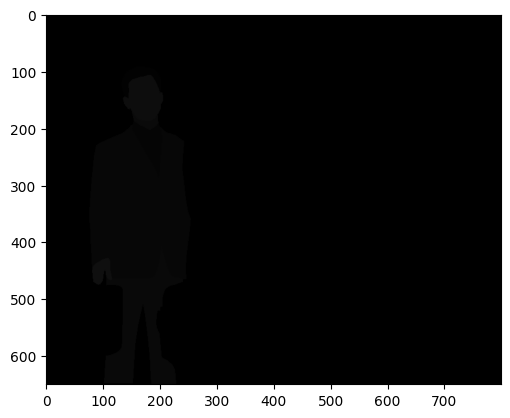

In [10]:
img_path = "/dscilab_nhanpham/workspace/YOLOv8_HP/Exp/CenterHist/val_parsing/0000004-1.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

Center: (0.20625, 0.5692307692307692)
Width: 0.2225
Height: 0.8584615384615385
Image_width: 800
Image height: 650
Top-left: 75 90
Right-bottom: 254 649


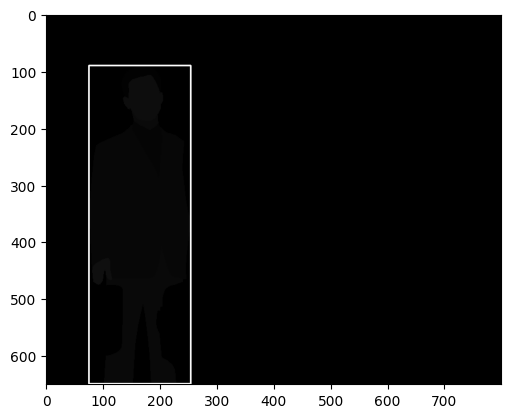

In [11]:
cx,cy,w,h = create_anchor_pos(img)
draw_bb(img,cx,cy,w,h)

In [12]:
crop_img = crop_image(img, cx,cy,w,h)
crop_img.shape

(559, 179)

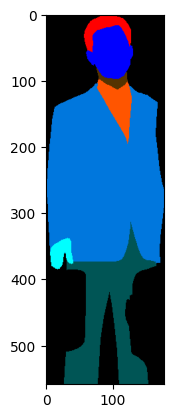

In [13]:
cv2_imshow(decode_labels(crop_img))

In [14]:
scale_img = scale_and_padding_image(crop_img)
scale_img.shape

(250, 150)

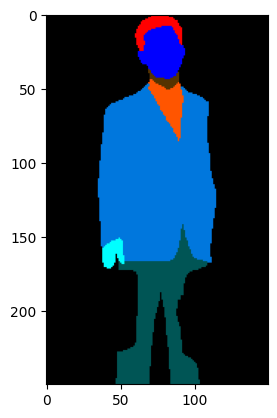

In [15]:
cv2_imshow(decode_labels(scale_img))

In [16]:
contours = create_contour(scale_img)
len(contours)

20

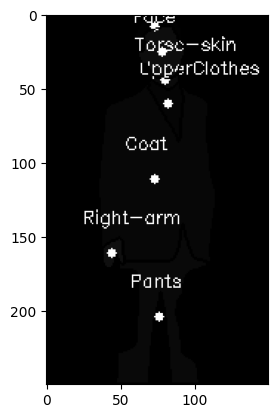

In [17]:
find_center(scale_img, contours, classes=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

In [18]:
res = "file"
for cl,c in enumerate(contours):
    if c == ():
        res = res + " None None"
        continue
    # compute the center of the contour
    M = cv2.moments(c[0])
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    res = res + " {} {}".format(cX,cY)

In [19]:
res

'file None None None None 73 8 None None None None 82 60 None None 73 111 None None 76 204 80 44 None None None None 78 25 None None 44 161 None None None None None None None None'

# Process all images

In [20]:
val_path = "/dscilab_nhanpham/workspace/YOLOv8_HP/Exp/CenterHist/val_parsing/"
train_path = "/dscilab_nhanpham/workspace/YOLOv8_HP/Exp/CenterHist/train_parsing/"

In [21]:
val_list = os.listdir(val_path)
train_list = os.listdir(train_path)
print(len(val_list))
print(len(train_list))

17520
93213


In [22]:
all_list = [val_path + val for val in val_list]
all_list = all_list + [train_path + train for train in train_list]
print(len(all_list))

110733


In [23]:
import multiprocessing

In [24]:
f = open("result.txt", "a")

In [25]:
def process(file):
    res = file.split('/')[-1][:-4]
    image = preprocess(file)
    contours = create_contour(image)
    for cl,c in enumerate(contours):
        if cl == 0:
            continue
        if c == ():
            res = res + " None None"
            continue
        # compute the center of the contour
        M = cv2.moments(c[0])
        if M["m00"] == 0:
            res = res + " None None"
            continue
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        res = res + " {} {}".format(cX,cY)
    res += "\n"
    f.write(res)

In [ ]:
pool = multiprocessing.Pool()
pool = multiprocessing.Pool(processes=48)
outputs = pool.map(process, all_list)

In [ ]:
f.close()

# Import thư viện và các hàm hỗ trợ

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
def cv2_imshow(cv2image):
    plt.axis('off')
    plt.imshow(cv2.cvtColor(cv2image, cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
# Kích thước ảnh chuẩn
STANDARD_W = 150
STANDARD_H = 250
# colour map
labels_decoder = ["Background", "Hat", "Hair", "Glove", "Sunglasses", "UpperClothes", "Dress", "Coat", "Socks", "Pants", "Torso-skin", "Scarf", "Skirt", "Face", "Left-arm", "Right-arm", "Left-leg", "Right-leg", "Left-shoe", "Right-shoe", "Person"]
label_colours = [(0,0,0)
                , (128,0,0), (255,0,0), (0,85,0), (170,0,51), (255,85,0), (0,0,85), (0,119,221), (85,85,0), (0,85,85), (85,51,0), (52,86,128), (0,128,0)
                , (0,0,255), (51,170,221), (0,255,255), (85,255,170), (170,255,85), (255,255,0), (255,170,0)]

def decode_labels(image):
    h, w = image.shape
    r, g ,b = [], [] , []
    for i in range(h):
        for j in range(w):
            x,y,z = label_colours[image[i,j]]
            r.append(x)
            g.append(y)
            b.append(z)
    r = np.array(r, dtype=np.uint8).reshape((h,w))
    g = np.array(g, dtype=np.uint8).reshape((h,w))
    b = np.array(b, dtype=np.uint8).reshape((h,w))
    return cv2.merge((b,g,r))

def merge_parsing(image, label):
    h,w,c = image.shape
    r,g,b = [], [], []
    for i in range(h):
        for j in range(w):
            if label[i,j,0] != 0 or label[i,j,1] != 0 or label[i,j,2] != 0:
                r.append(label[i,j,0])
                g.append(label[i,j,1])
                b.append(label[i,j,2])
            else:
                r.append(image[i,j,0])
                g.append(image[i,j,1])
                b.append(image[i,j,2])
    r = np.array(r, dtype=np.uint8).reshape((h,w))
    g = np.array(g, dtype=np.uint8).reshape((h,w))
    b = np.array(b, dtype=np.uint8).reshape((h,w))
    return cv2.merge((r,g,b))

In [ ]:
def create_anchor_pos(image):
    # height and width of image
    h, w = image.shape
    # Top-left and right-bottom position
    min_x, min_y, max_x, max_y = w, h, 0, 0
    for i in range(h):
        for j in range(w):
            if image[i,j] != 0:
                if j < min_x: min_x = j
                if i < min_y: min_y = i
                if j > max_x: max_x = j
                if i > max_y: max_y = i
    # Use block below to padding bounding box
    """
    padding = 0
    min_x -= padding
    min_y -= padding
    max_x += padding
    max_y += padding
    """
    # Normalize position
    min_x /= w
    max_x /= w
    min_y /= h
    max_y /= h
    # Return anchor-box (center_x, center_y, width, height)
    return (min_x+max_x)/2.0, (min_y+max_y)/2.0, max_x-min_x, max_y-min_y

def draw_bb(image, cx, cy, w, h):
    row = 0
    center = (cx, cy)
    print("Center: {}".format(center))
    width = w
    height = h
    print("Width: {}".format(width))
    print("Height: {}".format(height))
    w_p = image.shape[1]
    h_p = image.shape[0]
    print("Image_width: {}".format(w_p))
    print("Image height: {}".format(h_p))

    # Top left point
    x1, y1 = int((center[0] - width/2)*w_p), int((center[1] - height/2)*h_p)
    # Bottom right point
    x2, y2 = int((center[0] + width/2)*w_p), int((center[1] + height/2)*h_p)
    print("Top-left: {} {}".format(x1, y1))
    print("Right-bottom: {} {}".format(x2, y2))
    new_image = image.copy()
    cv2_imshow(image)
    cv2.rectangle(new_image, (x1,y1), (x2, y2), (255, 255, 255), 2)
    cv2_imshow(new_image)

def crop_image(original_image):
    center_x, center_y, width, height = create_anchor_pos(original_image)
    ori_w = original_image.shape[1]
    ori_h = original_image.shape[0]
    left = int((center_x - width / 2)*ori_w)
    top = int((center_y - height / 2)*ori_h)
    right = int((center_x + width / 2)*ori_w)
    bottom = int((center_y + height / 2)*ori_h)
    cropped_image = original_image[top:bottom, left:right]
    return cropped_image

def scale_and_padding_image(original_image):
    original_height, original_width = original_image.shape[:2]
    scale_x = STANDARD_W / original_width
    scale_y = STANDARD_H / original_height
    scale_factor = min(scale_x, scale_y)
    pil_image = Image.fromarray(original_image)
    pil_image = pil_image.resize((int(scale_factor*original_width), int(scale_factor*original_height)), resample=Image.NEAREST)
    resized_image = np.array(pil_image)
    pad_x = (STANDARD_W - resized_image.shape[1]) // 2
    pad_y = (STANDARD_H - resized_image.shape[0]) // 2
    padded_image = cv2.copyMakeBorder(resized_image, pad_y, pad_y, pad_x, pad_x, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    return padded_image

In [ ]:
# Định nghĩa hàm tạo hình mới từ hình nhị phân cũ sao cho kết quả contours giảm đi một đường
# Tiền điều kiện: hình nhập vào nếu contour thì sẽ cho ra nhiều hơn 1 đường
def draw_additional_line(bin_img: np.ndarray, label: int) -> np.ndarray:
  # Tìm contours
  cons, _ = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  # Tìm 2 điểm gần nhau nhất
  con01, con02 = cons[0], cons[1]
  min_ids = (0, 0)
  min = np.linalg.norm(con01[0] - con02[0])
  for i in range(con01.shape[0]):
    for j in range(con02.shape[0]):
      dist = np.linalg.norm(con01[i] - con02[j])
      if dist < min:
        min = dist
        min_ids = (i,j)
  # Vẽ ảnh mới với việc thêm một đường thẳng
  ans_img = bin_img.copy()
  start_point = (con01[min_ids[0]][0][0], con01[min_ids[0]][0][1])
  end_point = (con02[min_ids[1]][0][0], con02[min_ids[1]][0][1])
  thickness = 2
  cv2.line(ans_img, start_point, end_point, label, thickness)
  return ans_img

def create_contour(gray_image):
    # Create list of 21 new image, with each image is a unique class. Class 21 is whole person
    h, w = gray_image.shape
    class_imgs = [np.zeros((h, w)) for i in range(20)]

    # Put label value from gray_image into class_img
    for row in range(h):
        for col in range(w):
            label = gray_image[row][col]
            class_imgs[label][row][col] = label
            # if label > 0: class_imgs[20][row][col] = 20
        class_imgs = [np.array(img, np.uint8) for img in class_imgs]

    # Using the cv2 contour to create edges
    source_imgs = [img.copy() for img in class_imgs]
    contours = []
    for i in range(len(source_imgs)):
        contour, hierarchy = cv2.findContours(source_imgs[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        while (len(contour) > 1):
            source_imgs[i] = draw_additional_line(source_imgs[i], i)
            contour, hierarchy = cv2.findContours(source_imgs[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        contours.append(contour)
    return contours

def find_center(image, contours, classes=[]):
    clone_image = image.copy()
    color_img = decode_labels(clone_image)
    for cl,c in enumerate(contours):
        if c == ():
            continue
        if cl not in classes:
            continue
        # compute the center of the contour
        M = cv2.moments(c[0])
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        
        # draw the contour and center of the shape on the image
        cv2.drawContours(color_img, [c[0]], -1, (0, 255, 0), 1)
        cv2.circle(color_img, (cX, cY), 3, (255, 255, 255), -1)
        cv2.putText(color_img, labels_decoder[int(cl)], (cX-5, cY + 10),
            cv2.FONT_HERSHEY_DUPLEX, 0.35, (255, 255, 255), 1)
    cv2_imshow(color_img)

# Minh hoạ trọng tâm của 1 ảnh

In [ ]:
# def find_center(image_path, annot_path, classes=[]):
#     with open(annot_path, 'r') as f:
#         labels = f.read().splitlines()
#     img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     h,w = img.shape[:2]
#     color_img = decode_labels(img)
#     for label in labels:
#         class_id, *poly = label.split(' ')
#         if int(class_id) in classes:
#             poly = np.asarray(poly,dtype=np.float16).reshape(-1,2) # Read poly, reshape
#             poly *= [w,h] # Unscale
#             c = poly.astype('int')
#             c = c.reshape(-1,1,2)

#             M = cv2.moments(c)
#             cX = int(M["m10"] / M["m00"])
#             cY = int(M["m01"] / M["m00"])

#             # draw the contour and center of the shape on the image
#             cv2.drawContours(color_img, [c], -1, (0, 255, 0), 2)
#             cv2.circle(color_img, (cX, cY), 7, (255, 255, 255), -1)
#             cv2.putText(color_img, labels_decoder[int(class_id)], (cX-20, cY + 20),
#             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
#     # cv2_imshow(color_img)
#     return color_img

In [ ]:
ori_image_path = "/dscilab_nhanpham/workspace/YOLOv8_HP/TrainCIHP/datasets/CIHP/valid/images/0000004.jpg"
ori_label_path = "/dscilab_nhanpham/workspace/YOLOv8_HP/Exp/CenterHist/example/0000004.png"
image_path1 = "/dscilab_nhanpham/workspace/YOLOv8_HP/Exp/CenterHist/val_parsing/0000004-1.png"
image_path2 = "/dscilab_nhanpham/workspace/YOLOv8_HP/Exp/CenterHist/val_parsing/0000004-2.png"
image_path3 = "/dscilab_nhanpham/workspace/YOLOv8_HP/Exp/CenterHist/val_parsing/0000004-3.png"
image_path4 = "/dscilab_nhanpham/workspace/YOLOv8_HP/Exp/CenterHist/val_parsing/0000004-4.png"

label_path1 = "/dscilab_nhanpham/workspace/YOLOv8_HP/Exp/CenterHist/example/0000004-1.txt"
label_path2 = "/dscilab_nhanpham/workspace/YOLOv8_HP/Exp/CenterHist/example/0000004-2.txt"
label_path3 = "/dscilab_nhanpham/workspace/YOLOv8_HP/Exp/CenterHist/example/0000004-3.txt"
label_path4 = "/dscilab_nhanpham/workspace/YOLOv8_HP/Exp/CenterHist/example/0000004-4.txt"

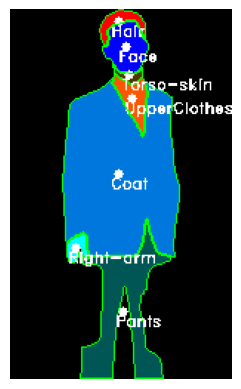

In [ ]:
img1 = scale_and_padding_image(crop_image(cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)))
find_center(img1, create_contour(img1), classes=[i for i in range(20)])

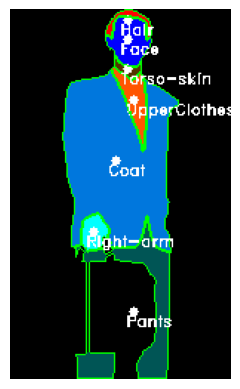

In [ ]:
img2 = scale_and_padding_image(crop_image(cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)))
find_center(img2, create_contour(img2), classes=[i for i in range(20)])

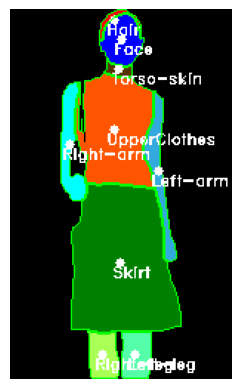

In [ ]:
img3 = scale_and_padding_image(crop_image(cv2.imread(image_path3, cv2.IMREAD_GRAYSCALE)))
find_center(img3, create_contour(img3), classes=[i for i in range(20)])

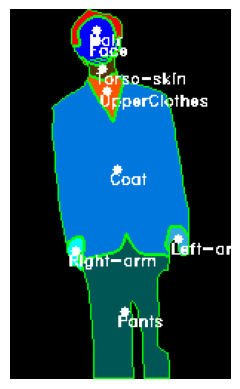

In [ ]:
img4 = scale_and_padding_image(crop_image(cv2.imread(image_path4, cv2.IMREAD_GRAYSCALE)))
find_center(img4, create_contour(img4), classes=[i for i in range(20)])

# Heatmap cho trọng tâm của các bộ phận

In [ ]:
labels_decoder = ["Background", "Hat", "Hair", "Glove", "Sunglasses", "UpperClothes", "Dress", "Coat", "Socks", "Pants", "Torso-skin", "Scarf", "Skirt", "Face", "Left-arm", "Right-arm", "Left-leg", "Right-leg", "Left-shoe", "Right-shoe", "Person"]

In [ ]:
file_path = "/dscilab_nhanpham/workspace/YOLOv8_HP/Exp/CenterHist/result.txt"
class_1 = []
class_2 = []
class_3 = []
class_4 = []
class_5 = []
class_6 = []
class_7 = []
class_8 = []
class_9 = []
class_10 = []
class_11 = []
class_12 = []
class_13 = []
class_14 = []
class_15 = []
class_16 = []
class_17 = []
class_18 = []
class_19 = []
with open(file_path, 'r') as f:
    instances = f.read().splitlines()
    for instance in instances:
        center = instance.split(' ')
        class_idx = 1
        for i in range(1,38,2):
            if center[i] != "None":
                class_list_name = f"class_{class_idx}"
                current_class_list = globals()[class_list_name]
                current_class_list.append([int(center[i]), int(center[i+1])])
            class_idx += 1

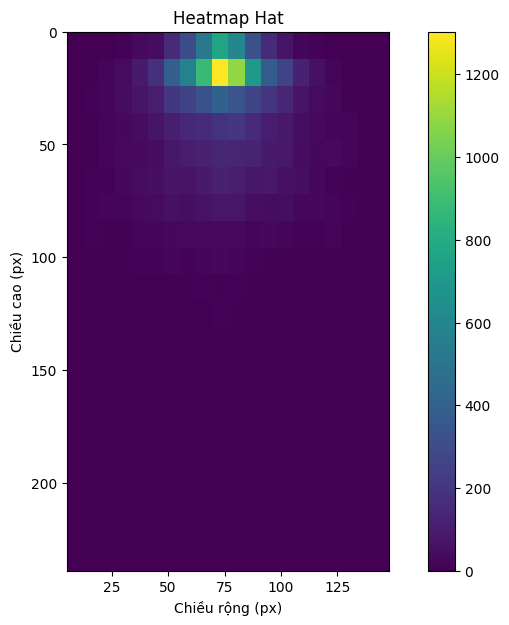

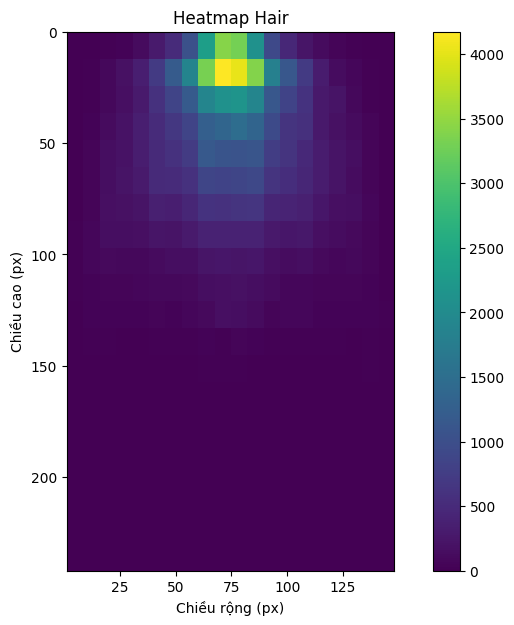

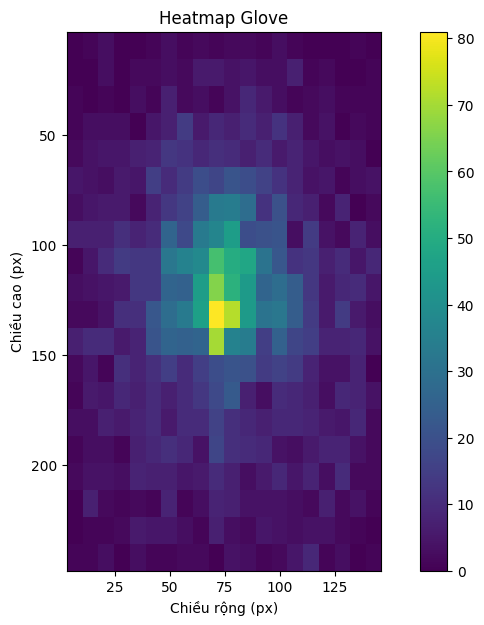

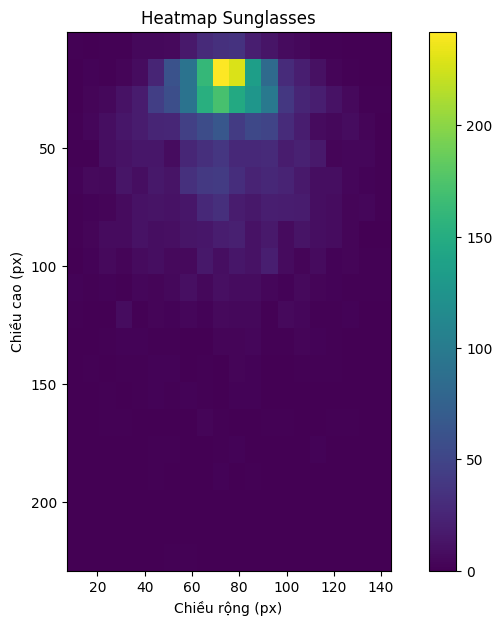

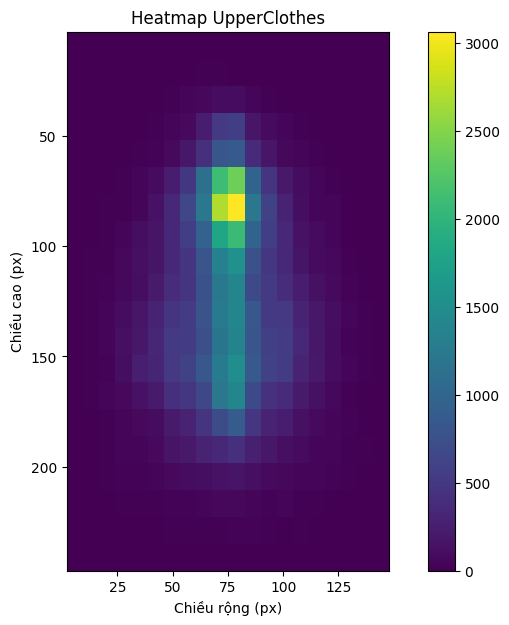

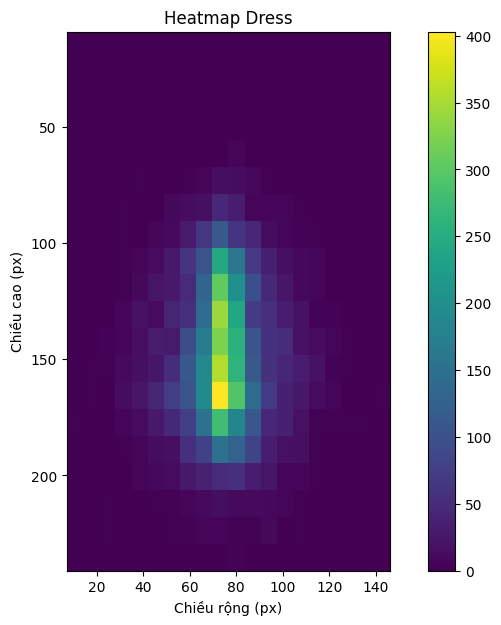

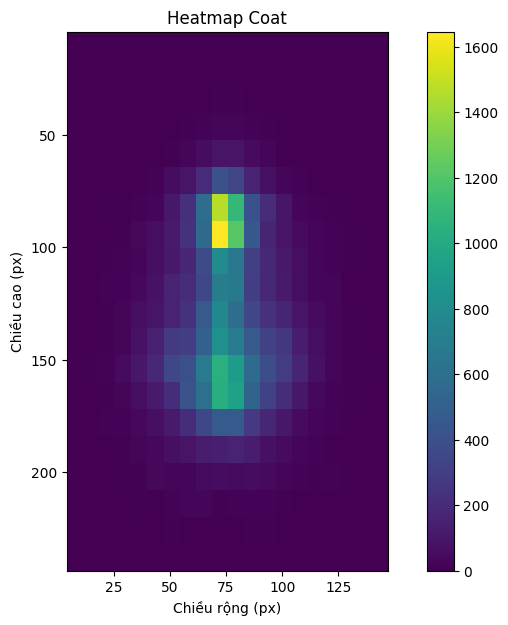

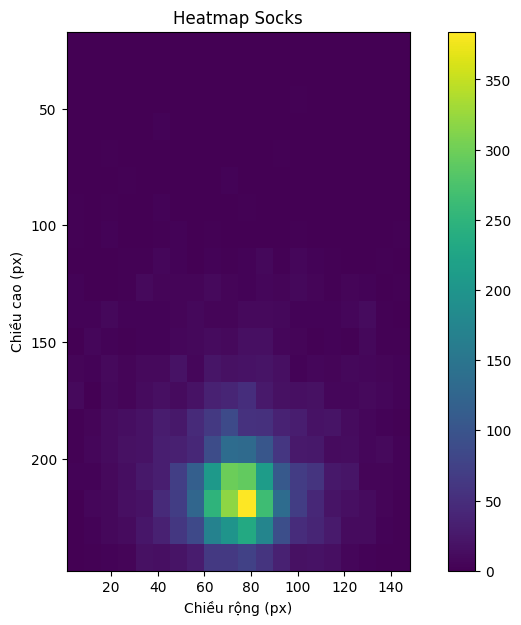

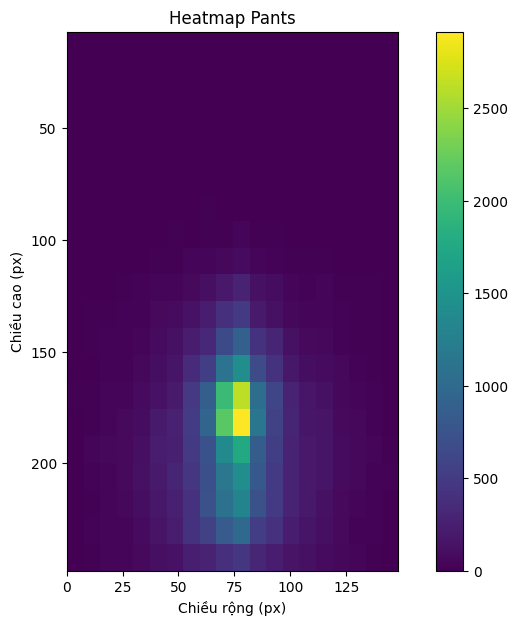

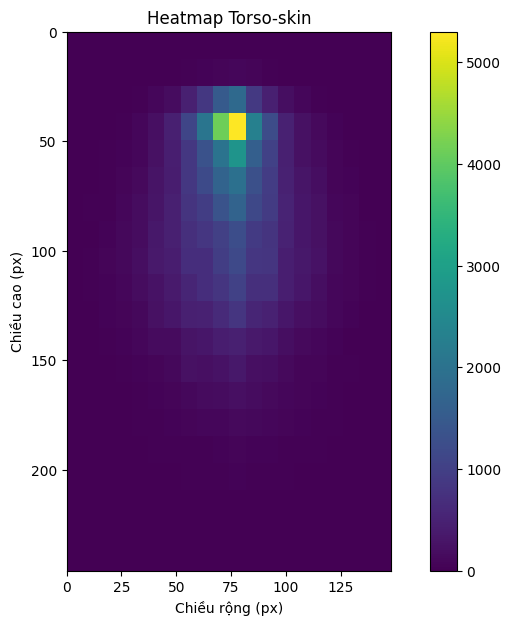

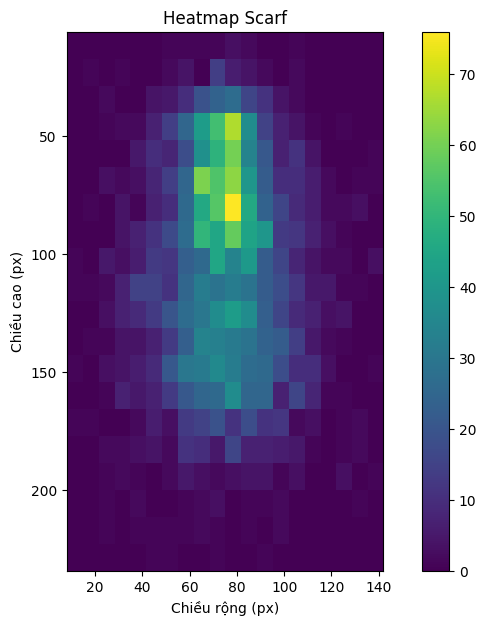

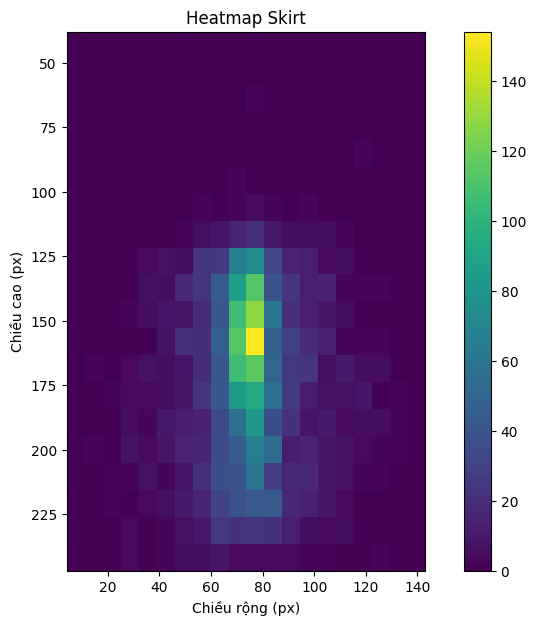

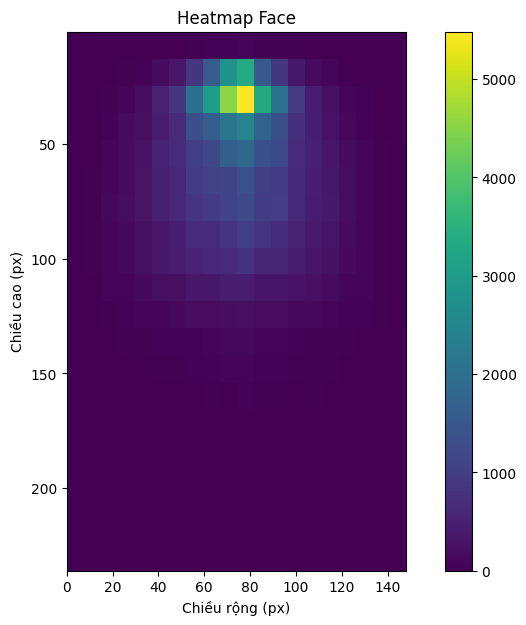

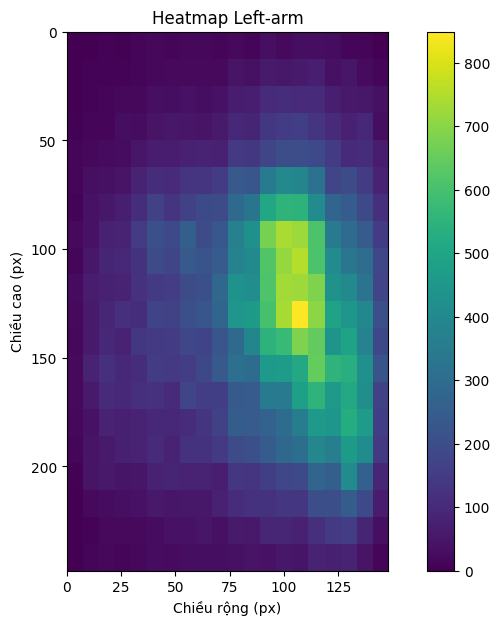

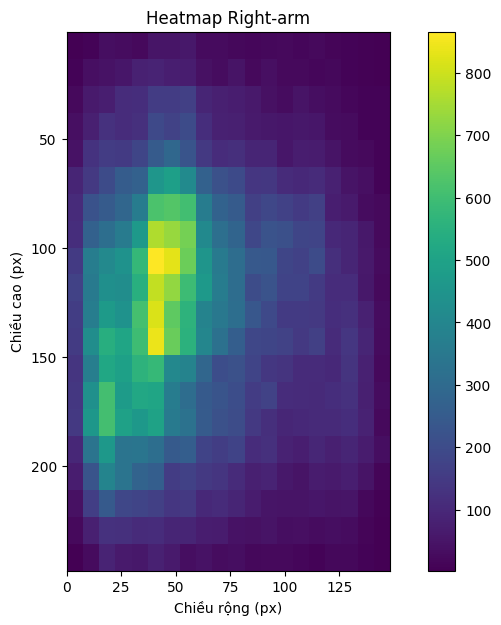

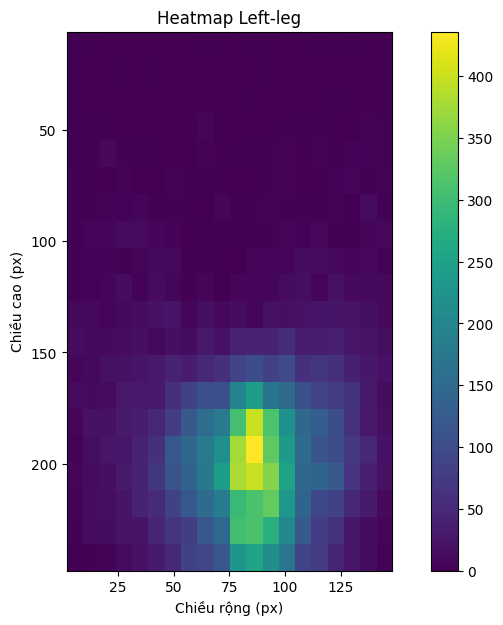

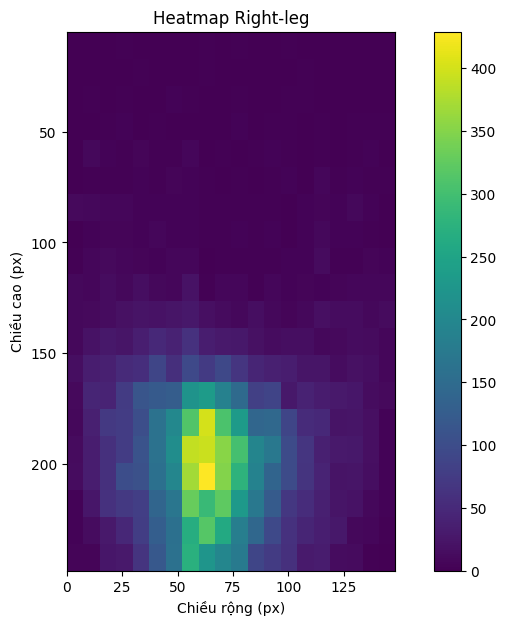

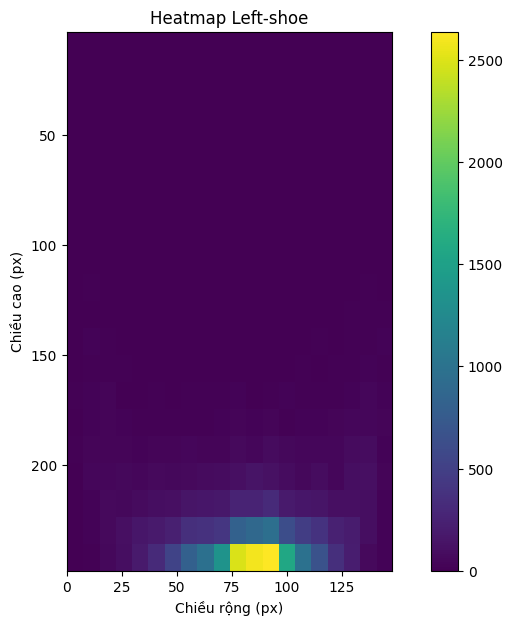

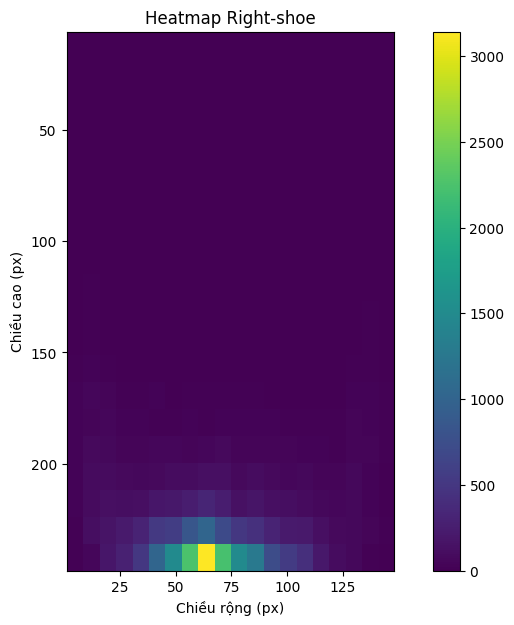

In [ ]:
for i in range(1,20):
    class_list_name = f"class_{i}"
    current_class_list = globals()[class_list_name]
    x01 = [point[0] for point in current_class_list]
    y01 = [point[1] for point in current_class_list]
    if len(x01) == 0:
        continue
    fig = plt.figure(figsize=(10, 7)) 
    
    # setting values to rows and column variables 
    # rows = 1
    # columns = 2
    
    # # Tạo plot
    # fig.add_subplot(rows, columns, 1) 
    # plt.scatter(x01, y01, label="Image", color="blue")
    # plt.gca().set_aspect('equal', adjustable='box')
    # plt.grid()
    # plt.xlim(0,150)
    # plt.ylim(250,0)
    # # Đánh tên cho trục
    # plt.xlabel("Width (px)")
    # plt.ylabel("Height (px)")
    # plt.title(labels_decoder[i])
    # plt.legend(loc="best")
    
    # fig.add_subplot(rows, columns, 2) 
    heatmap, xedges, yedges = np.histogram2d(x01, y01, bins=(20, 20))
    # Plot the heatmap
    plt.imshow(heatmap.T, origin='lower', extent=[min(x01), max(x01), min(y01), max(y01)], cmap='viridis', interpolation='nearest')
    plt.colorbar()
    # plt.xlim(0,150)
    # plt.ylim(250,0)
    plt.gca().invert_yaxis()
    plt.xlabel('Chiều rộng (px)')
    plt.ylabel('Chiều cao (px)')
    plt.title('Heatmap '+labels_decoder[i])
    
    # Hiện plot
    plt.show()

In [ ]:
# x01 = [point[0] for point in class_19]
# y01 = [point[1] for point in class_19]

# fig = plt.figure(figsize=(10, 7)) 

# # setting values to rows and column variables 
# rows = 1
# columns = 2

# # Tạo plot
# fig.add_subplot(rows, columns, 1) 
# plt.scatter(x01, y01, label="Image", color="blue")
# plt.gca().set_aspect('equal', adjustable='box')
# plt.grid()
# plt.xlim(0,150)
# plt.ylim(250,0)
# # Đánh tên cho trục
# plt.xlabel("Width (px)")
# plt.ylabel("Height (px)")
# plt.title(labels_decoder[i])
# plt.legend(loc="best")

# fig.add_subplot(rows, columns, 2) 
# heatmap, xedges, yedges = np.histogram2d(x01, y01, bins=(20, 20))
# # Plot the heatmap
# plt.imshow(heatmap.T, origin='lower', extent=[min(x01), max(x01), min(y01), max(y01)], cmap='viridis', interpolation='nearest')
# plt.colorbar()
# plt.xlim(0,150)
# plt.ylim(250,0)
# plt.xlabel('Width')
# plt.ylabel('Height')
# plt.title('Heatmap '+labels_decoder[i])

# # Hiện plot
# plt.show()